### Exploratory Data Analysis on the Bank Churners Dataset

ABC Bank has provided us with a dataset that contains customer details for their customers in BankAttrition - Details.csv file. The transactions related information and what kind of credit card the customer holds is provided to us in another file Transaction and Card Details.csv. The bank is currently facing problems of customer attrition. They have consulted us to understand how can they understand the patterns of customer attrition and if they can get early signals so to stop losing customers.

- Import the files and create an ADS (Analytical Dataset) and check for missing values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/Users/anushameghawatjain/Downloads'

In [3]:
# bank_details = pd.read_csv('/Users/anushameghawatjain/Downloads/Fractal_Crossover_batch/Datasets/BankAttrition_Details.csv')
# transaction_details = pd.read_csv('/Users/anushameghawatjain/Downloads/Fractal_Crossover_batch/Datasets/Transaction_and_Card_Details.csv')





In [4]:
path_data1 = '/Users/anushameghawatjain/Downloads/Fractal_Crossover_batch/Datasets/BankAttrition_Details.csv'
path_data2 = '/Users/anushameghawatjain/Downloads/Fractal_Crossover_batch/Datasets/Transaction_and_Card_Details.csv'

In [5]:
df1 = pd.read_csv(path_data1)

In [6]:
df2 = pd.read_csv(path_data2)

In [7]:
df1.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category  
0     High School        Married     $60K - $80K  
1        Graduate         Single  Less than $40K  
2        Graduate        Married    $80K - $120K  
3     High School        Unknown  Less than $40K  
4      Uneducated        Married     $60K - $80K

In [8]:
df2.head()

CLIENTNUM Card_Category  Months_on_book  Total_Relationship_Count  \
0  768805383          Blue              39                         5   
1  818770008          Blue              44                         6   
2  713982108          Blue              36                         4   
3  769911858          Blue              34                         3   
4  709106358          Blue              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [9]:
df1.shape

(10127, 8)

In [10]:
df2.shape

(10127, 14)

In [11]:
df2.columns

Index(['CLIENTNUM', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [12]:
df1.isna().sum()

CLIENTNUM          0
Attrition_Flag     0
Customer_Age       0
Gender             0
Dependent_count    0
Education_Level    0
Marital_Status     0
Income_Category    0
dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  int64 
 1   Attrition_Flag   10127 non-null  object
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Dependent_count  10127 non-null  int64 
 5   Education_Level  10127 non-null  object
 6   Marital_Status   10127 non-null  object
 7   Income_Category  10127 non-null  object
dtypes: int64(3), object(5)
memory usage: 633.1+ KB


In [14]:
df2.isna().sum()

CLIENTNUM                   0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [15]:
set(df1.CLIENTNUM.values)

{743800833,
 774012933,
 721027083,
 714014733,
 710869008,
 717553683,
 788824083,
 720371733,
 772341783,
 708804633,
 798687258,
 711622683,
 715161633,
 772407333,
 812089383,
 710639658,
 713818158,
 713490483,
 718078008,
 713556033,
 793608258,
 789413958,
 715358283,
 713261133,
 802455633,
 816513108,
 709787733,
 719978583,
 788791383,
 716832858,
 712278108,
 710180958,
 712999008,
 719356008,
 789577833,
 718307433,
 716210283,
 720437358,
 716931183,
 771719283,
 709230708,
 720470133,
 789643383,
 717684858,
 824770683,
 748617858,
 819200133,
 718110858,
 712867983,
 710082708,
 778928283,
 713982108,
 713293983,
 716177583,
 721092783,
 758317233,
 714080433,
 809599158,
 760807608,
 715522233,
 714473658,
 787513533,
 715915458,
 794558658,
 781942983,
 711393483,
 716308683,
 714211533,
 719880408,
 713588958,
 808747233,
 709066983,
 720306408,
 789151983,
 709820658,
 793379058,
 721060083,
 714047733,
 768475383,
 715849983,
 809959683,
 711655683,
 817332483,
 708

In [16]:
len(set(df1.CLIENTNUM.values).intersection(set(df2.CLIENTNUM.values)))

10127

Hence there are no duplicate rows, and all the client ids in the first data set are present in the second data set as well.

In [17]:
df1.shape, df2.shape

((10127, 8), (10127, 14))

In [20]:
df_join_inner = pd.merge(df1, df2, how='inner', on='CLIENTNUM')

In [21]:
df_join_outer = pd.merge(df1,df2, how='outer',on='CLIENTNUM')

In [22]:
df_join_inner.shape, df_join_outer.shape

((10127, 21), (10127, 21))

In [21]:
df_join_inner.shape

(10127, 21)

In [22]:
df_join_inner.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [23]:
ads2 = df_join_inner

In [23]:
ads = df_join_inner.copy()

In [24]:
ads.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

- Convert the variables into relevant data types

In [25]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [26]:
ads['CLIENTNUM'] = ads['CLIENTNUM'].astype('category')

In [28]:
#ads['CLIENTNUM'] = ads['CLIENTNUM'].astype('category')
ads['Attrition_Flag'] = ads['Attrition_Flag'].astype('category')
ads['Gender'] = ads['Gender'].astype('category')
ads['Education_Level'] = ads['Education_Level'].astype('category')
ads['Marital_Status'] = ads['Marital_Status'].astype('category')
ads['Income_Category'] = ads['Income_Category'].astype('category')
ads['Card_Category'] = ads['Card_Category'].astype('category')

In [29]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  category
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [30]:
ads['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [31]:
!pip install seaborn

You are using pip version 9.0.1, however version 21.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


- Separate the Target variable and independent variables

In [30]:
#create a new dataframe only with target variable + CLIENTNUM
ads_target = ads[['CLIENTNUM', 'Attrition_Flag']]

In [31]:
#drop the target variable
ads_independent = ads.drop(['Attrition_Flag'],axis=1)

In [32]:
ads_target.shape , ads_independent.shape

((10127, 2), (10127, 20))

In [33]:
ads_independent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

#### Understand your target variable

In [38]:
ads_target.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [37]:
(ads_target.Attrition_Flag.value_counts(normalize=True)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

In [38]:
# 1 - attrition - 16%
# 0 - non-attrition - 84%

#### Understand your Independent Variables (Feature Set)

### write your comments here

In [39]:
ads_independent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

### separate categorical and numerical features

In [57]:
ads_categorical = ads_independent.select_dtypes(include = ['category','object']).copy()


In [51]:
ads_numerical = ads_independent.select_dtypes(include = ['int64','float64']).copy()


In [52]:
ads_numerical.shape

(10127, 14)

In [53]:
num_vars = ads_independent.select_dtypes(exclude = ['category', 'object']).copy()


In [59]:
num_vars.shape

(10127, 14)

### Categorical and Numerical Variables

In [60]:
ads_categorical.shape

(10127, 6)

In [61]:
ads_categorical.head()

CLIENTNUM Gender Education_Level Marital_Status Income_Category  \
0  768805383      M     High School        Married     $60K - $80K   
1  818770008      F        Graduate         Single  Less than $40K   
2  713982108      M        Graduate        Married    $80K - $120K   
3  769911858      F     High School        Unknown  Less than $40K   
4  709106358      M      Uneducated        Married     $60K - $80K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue  
3          Blue  
4          Blue

In [62]:
num_vars.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Explore Categorical variables

In [59]:
import seaborn as sns

In [60]:
ads_categorical.head()

CLIENTNUM Gender Education_Level Marital_Status Income_Category  \
0  768805383      M     High School        Married     $60K - $80K   
1  818770008      F        Graduate         Single  Less than $40K   
2  713982108      M        Graduate        Married    $80K - $120K   
3  769911858      F     High School        Unknown  Less than $40K   
4  709106358      M      Uneducated        Married     $60K - $80K   

  Card_Category  
0          Blue  
1          Blue  
2          Blue  
3          Blue  
4          Blue

In [64]:
ads_categorical.Gender.value_counts(normalize=True).round(2)

F    0.53
M    0.47
Name: Gender, dtype: float64

In [65]:
ads_categorical.Marital_Status.value_counts(normalize=True).round(2)

Married     0.46
Single      0.39
Unknown     0.07
Divorced    0.07
Name: Marital_Status, dtype: float64

In [66]:
ads_categorical.Education_Level.value_counts(normalize=True).round(2)

Graduate         0.31
High School      0.20
Unknown          0.15
Uneducated       0.15
College          0.10
Post-Graduate    0.05
Doctorate        0.04
Name: Education_Level, dtype: float64

In [67]:
ads_categorical.Income_Category.value_counts(normalize=True).round(2)

Less than $40K    0.35
$40K - $60K       0.18
$80K - $120K      0.15
$60K - $80K       0.14
Unknown           0.11
$120K +           0.07
Name: Income_Category, dtype: float64

In [68]:
ads_categorical.Card_Category.value_counts(normalize=True).round(2)

Blue        0.93
Silver      0.05
Gold        0.01
Platinum    0.00
Name: Card_Category, dtype: float64

In [64]:
ads_categorical.Gender.value_counts(normalize=True).round(2)

F    0.53
M    0.47
Name: Gender, dtype: float64

In [69]:
import seaborn as sns

In [87]:
ads.Education_Level.value_counts().index

CategoricalIndex(['Graduate', 'High School', 'Unknown', 'Uneducated',
                  'College', 'Post-Graduate', 'Doctorate'],
                 categories=['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown'], ordered=False, dtype='category')

[Text(0, 0, 'College'),
 Text(1, 0, 'Doctorate'),
 Text(2, 0, 'Graduate'),
 Text(3, 0, 'High School'),
 Text(4, 0, 'Post-Graduate'),
 Text(5, 0, 'Uneducated'),
 Text(6, 0, 'Unknown')]

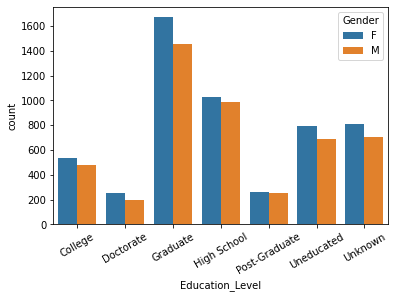

In [88]:
plot1 = sns.countplot(x='Education_Level',hue='Gender',data = ads_categorical)
plot1.set_xticklabels(rotation=30, labels = ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown'])

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

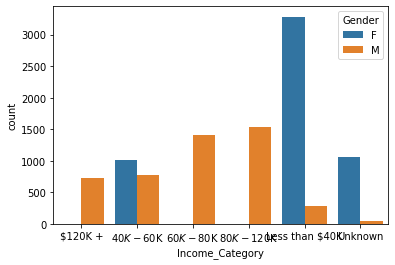

In [73]:
sns.countplot(x='Income_Category',hue='Gender',data = ads_categorical)

<AxesSubplot:xlabel='Gender', ylabel='count'>

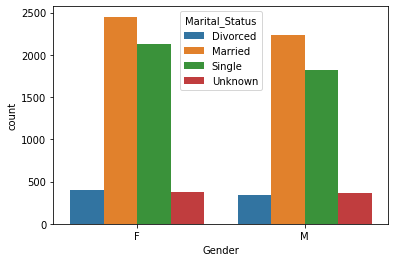

In [66]:
sns.countplot(x=ads_categorical['Gender'], hue = ads_categorical['Marital_Status'])

In [74]:
ads.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

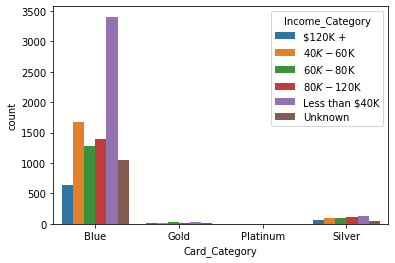

In [92]:
sns.countplot(x='Card_Category',hue='Income_Category',data = ads_categorical)

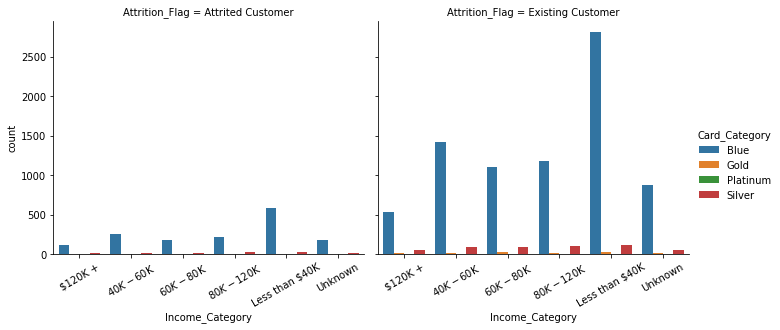

In [89]:
g1 = sns.catplot(x="Income_Category",hue="Card_Category", col="Attrition_Flag",
                data=ads, kind="count",
                height=4, aspect=1.2);
g1.set_xticklabels(rotation=30)

In [ ]:
ads_categorical.cross

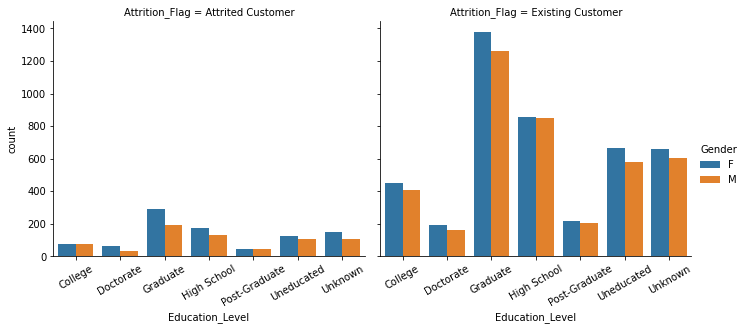

In [75]:
g = sns.catplot(x="Education_Level",hue="Gender", col="Attrition_Flag",
                data=ads, kind="count",
                height=4, aspect=1.2);
g.set_xticklabels(rotation=30)

### add percent to countplots

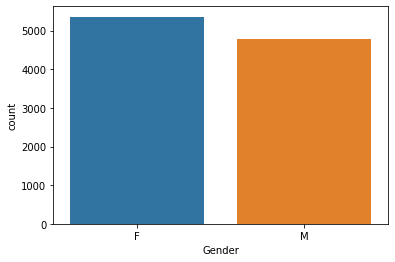

In [86]:
ax = sns.countplot(x=ads_categorical['Gender'])

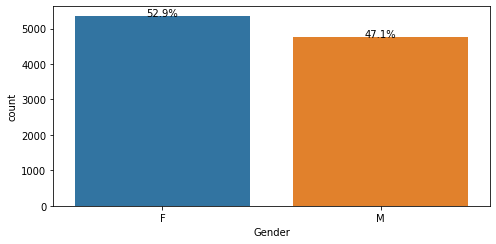

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
x1 = ads_categorical.Gender
y1 = ads_categorical.Gender.value_counts()
percentage = ads_categorical.Gender.value_counts(normalize=True)*100
ax = sns.countplot(x=x1)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

### Explore Numeric Variables

In [94]:
import seaborn as sns

In [95]:
num_vars.describe().shape, num_vars.shape

((8, 14), (10127, 14))

In [96]:
type(num_vars.columns)

pandas.core.indexes.base.Index

In [97]:
for i in num_vars.columns:
    ##print (i)
    print(f'range of {i}:[{ads[i].min()}, {ads[i].max()}]')

range of Customer_Age:[26, 73]
range of Dependent_count:[0, 5]
range of Months_on_book:[13, 56]
range of Total_Relationship_Count:[1, 6]
range of Months_Inactive_12_mon:[0, 6]
range of Contacts_Count_12_mon:[0, 6]
range of Credit_Limit:[1438.3, 34516.0]
range of Total_Revolving_Bal:[0, 2517]
range of Avg_Open_To_Buy:[3.0, 34516.0]
range of Total_Amt_Chng_Q4_Q1:[0.0, 3.397]
range of Total_Trans_Amt:[510, 18484]
range of Total_Trans_Ct:[10, 139]
range of Total_Ct_Chng_Q4_Q1:[0.0, 3.714]
range of Avg_Utilization_Ratio:[0.0, 0.9990000000000001]


In [98]:
num_vars.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

#### Outlier Detection

<AxesSubplot:xlabel='Total_Trans_Amt'>

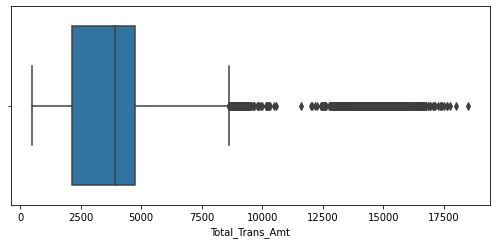

In [101]:
sns.boxplot(data = num_vars, x = 'Total_Trans_Amt')

<AxesSubplot:xlabel='Total_Revolving_Bal'>

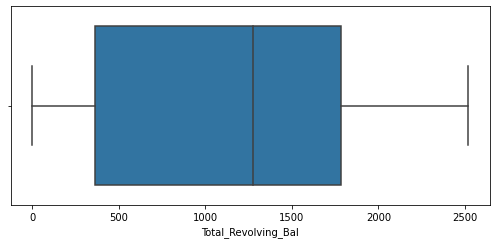

In [100]:
sns.boxplot(data = num_vars, x = 'Total_Revolving_Bal')

Hello! We are performing EDA on Analytical Data Set!!

## Describe the steps you are perfoming!

In [102]:
import numpy as np

percntl_05_trb = np.percentile(num_vars['Total_Revolving_Bal'], 5)
percntl_95_trb = np.percentile(num_vars['Total_Revolving_Bal'], 95)

perc_05_ttamt = np.percentile(num_vars['Total_Trans_Amt'], 5)
perc_95_ttamt = np.percentile(num_vars['Total_Trans_Amt'], 95)



In [103]:
percntl_05_trb, percntl_95_trb

(0.0, 2517.0)

In [104]:
perc_05_ttamt, perc_95_ttamt

(1283.3, 14212.0)

In [105]:
# Remove outliers
ads_cleaned = num_vars[(num_vars['Total_Trans_Amt'] > perc_05_ttamt) \
                       & (num_vars['Total_Trans_Amt'] < perc_95_ttamt)]


# Cap outliers
#ads_cleaned = num_vars[(num_vars['Total_Trans_Amt'] < perc_05_ttamt) & (num_vars['Total_Trans_Amt'] > perc_95_ttamt)]


In [106]:
ads_cleaned.shape

(9112, 14)

<AxesSubplot:xlabel='Total_Trans_Amt'>

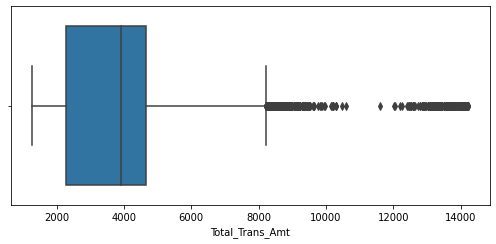

In [107]:
sns.boxplot(data = ads_cleaned, x = 'Total_Trans_Amt')

After cleaning the dataset, do you still observe outliers in the Avg_Open_to_Buy variable?

- Subset the dataset to select only those customers who hold a Platinum card and are married females. Show only those columns that are of numeric datatype

In [109]:
ads[(ads['Card_Category'] == "Platinum") & (ads['Gender'] == "F") & 
    (ads['Marital_Status'] == "Married")].select_dtypes(include = ['int64', 'float64'])

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
3800            51                2              42                         3   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
3800                       2                      3       15987.0   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
3800                  193          15794.0                 0.435   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3800             2021              46                0.394   

      Avg_Utilization_Ratio  
3800                  0.012

### Discrete Continuous Variables

(-0.020825535616339912, -0.6830166530893709)

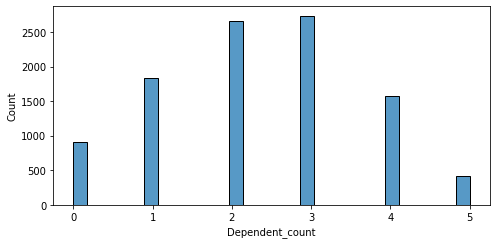

In [119]:
sns.histplot(num_vars["Dependent_count"])
num_vars["Dependent_count"].skew(), num_vars["Dependent_count"].kurtosis()

#### Histograms

In [109]:
num_vars.Customer_Age.mean()

46.32596030413745

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

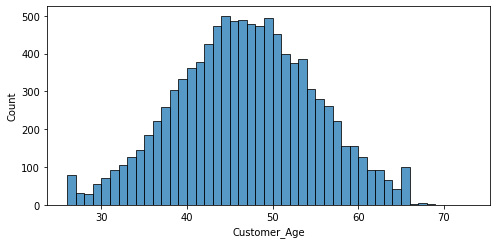

In [108]:
sns.histplot(num_vars['Customer_Age'])
#sns.histplot(num_vars["Customer_Age"])

In [111]:
num_vars['Customer_Age'].skew(), num_vars['Customer_Age'].kurtosis()

(-0.033605016317173456, -0.2886199152745088)

In [111]:
num_vars.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [114]:
num_vars.Credit_Limit.mean(), num_vars.Credit_Limit.median()

(8631.953698034955, 4549.0)

In [115]:
num_vars.Credit_Limit.mode()

0    34516.0
dtype: float64

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

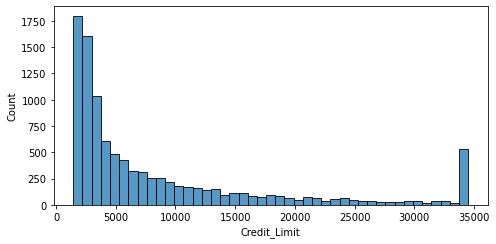

In [113]:
sns.histplot(num_vars['Credit_Limit'])

In [118]:
num_vars.Credit_Limit.skew()

1.666725807993647

In [119]:
num_vars.Credit_Limit.kurtosis()

1.8089893357093434

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

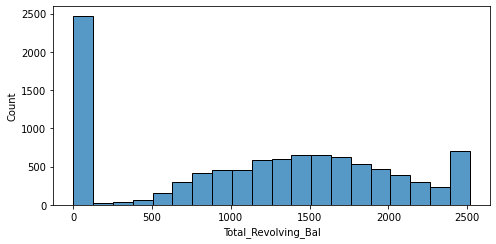

In [112]:
sns.histplot(num_vars['Total_Revolving_Bal'])


In [120]:
num_vars['Total_Revolving_Bal'].kurtosis()


-1.145991781532597

In [116]:
num_vars.Total_Trans_Amt.mode()

0    4253
1    4509
dtype: int64

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

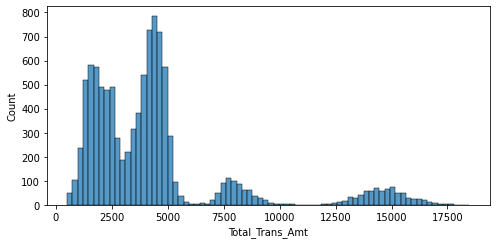

In [110]:
import seaborn as sns

sns.histplot(num_vars['Total_Trans_Amt'])

##sns.histplot(num_vars["Customer_Age"], binwidth = 1)

In [117]:
num_vars['Total_Trans_Amt'].skew()

2.0410034025756936

In [113]:
num_vars['Total_Trans_Amt'].skew(), num_vars['Total_Trans_Amt'].kurtosis()

(2.0410034025756936, 3.8940234056985163)

In [114]:
num_vars.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [115]:
!python --version

Python 3.6.1


#### KDE Plots

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

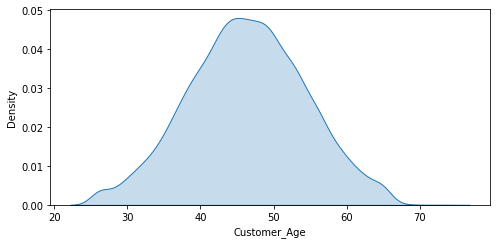

In [121]:
sns.kdeplot(num_vars["Customer_Age"], shade = True)

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Density'>

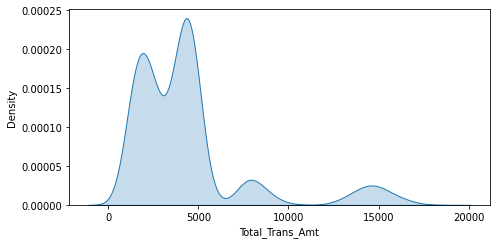

In [122]:
sns.kdeplot(num_vars["Total_Trans_Amt"], shade = True)

<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

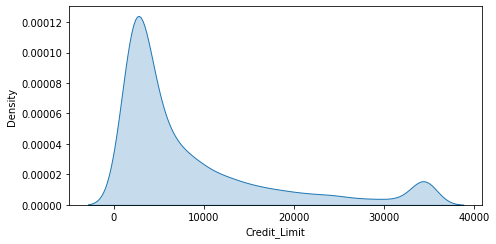

In [123]:
sns.kdeplot(num_vars["Credit_Limit"], shade = True)

In [117]:
num_vars["Customer_Age"].skew(), num_vars["Customer_Age"].kurtosis()

(-0.033605016317173456, -0.2886199152745088)

(2.0640305679077477, 15.689292901407043)

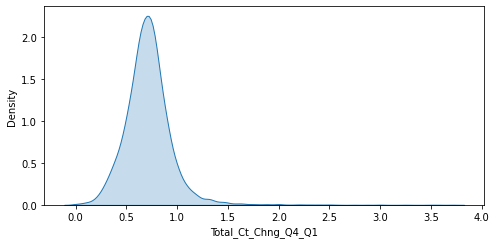

In [118]:
sns.kdeplot(num_vars["Total_Ct_Chng_Q4_Q1"], shade = True)
num_vars["Total_Ct_Chng_Q4_Q1"].skew(), num_vars["Total_Ct_Chng_Q4_Q1"].kurtosis()

### End to End UniVariate Analysis

In [137]:
import matplotlib.pyplot as plt

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,6), dpi = 50)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 30)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [138]:
def UVA_numeric_sample(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
     print(j,i)

In [139]:
UVA_numeric_sample(num_vars, list(num_vars.columns.values))

0 Customer_Age
1 Dependent_count
2 Months_on_book
3 Total_Relationship_Count
4 Months_Inactive_12_mon
5 Contacts_Count_12_mon
6 Credit_Limit
7 Total_Revolving_Bal
8 Avg_Open_To_Buy
9 Total_Amt_Chng_Q4_Q1
10 Total_Trans_Amt
11 Total_Trans_Ct
12 Total_Ct_Chng_Q4_Q1
13 Avg_Utilization_Ratio


<Figure size 9800x300 with 0 Axes>

In [140]:
type(list(num_vars.columns.values))

list

In [141]:
type(['Customer_Age', 'Credit_Limit', 'Dependent_count'])

list

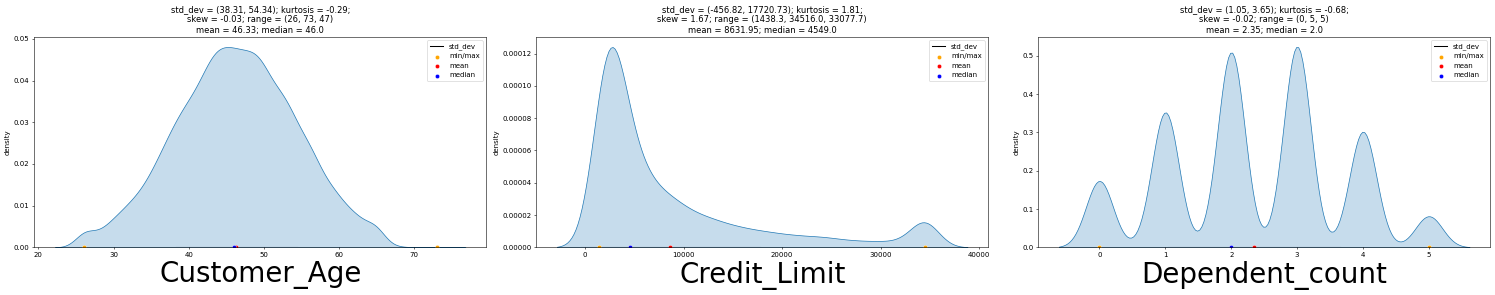

In [142]:
UVA_numeric(num_vars, ['Customer_Age', 'Credit_Limit', 'Dependent_count'])

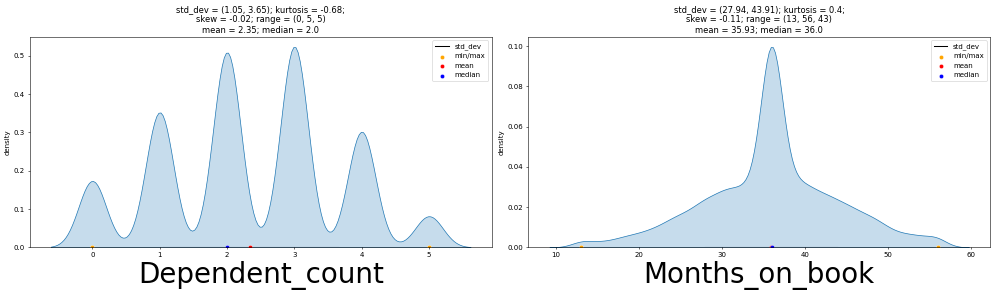

In [144]:
UVA_numeric(num_vars, num_vars.columns[1:3])

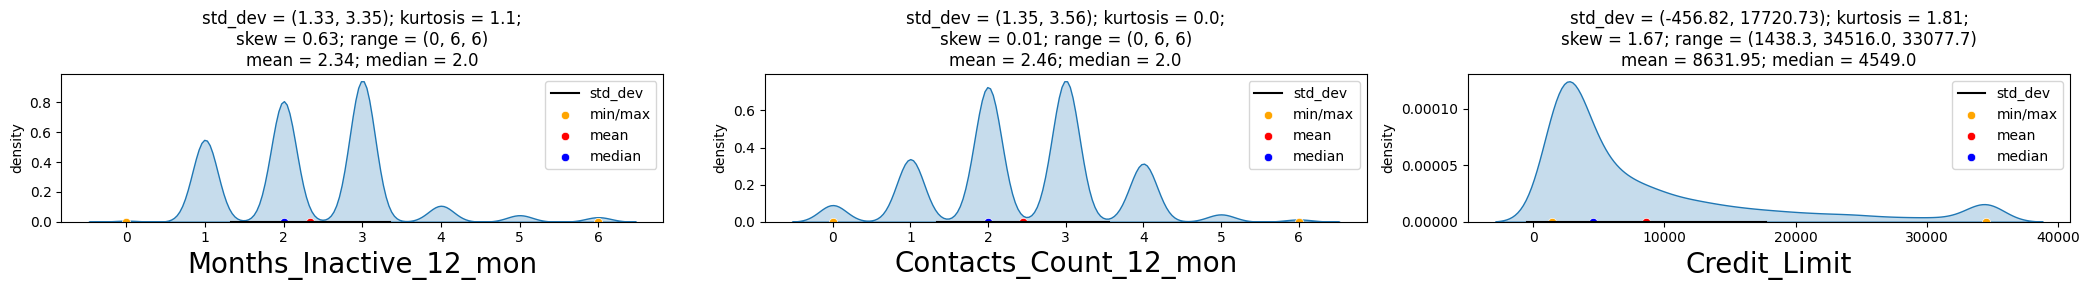

In [127]:
UVA_numeric(num_vars, num_vars.columns[4:7])

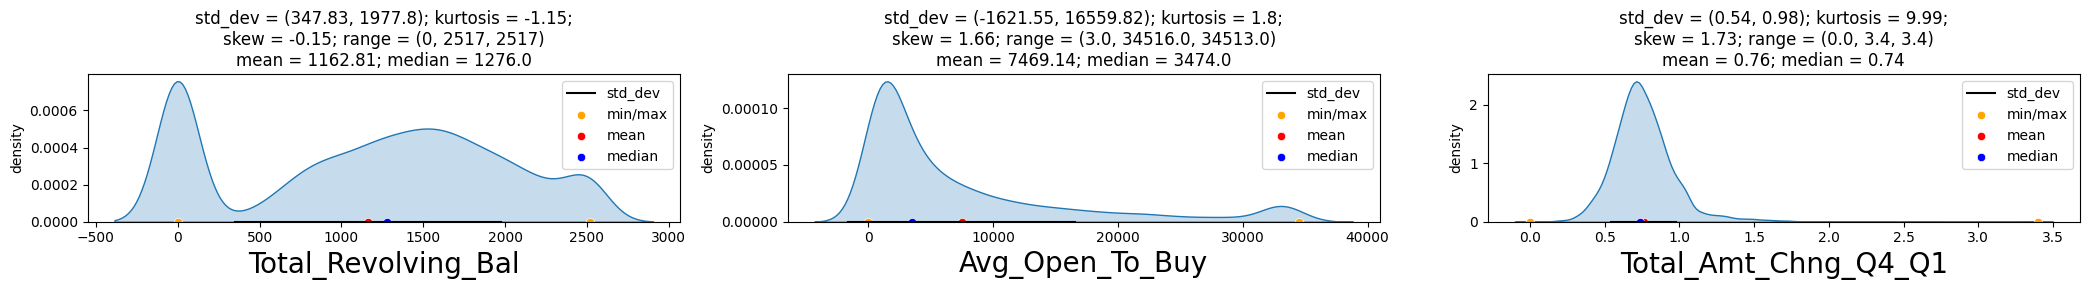

In [128]:
UVA_numeric(num_vars, num_vars.columns[7:10])

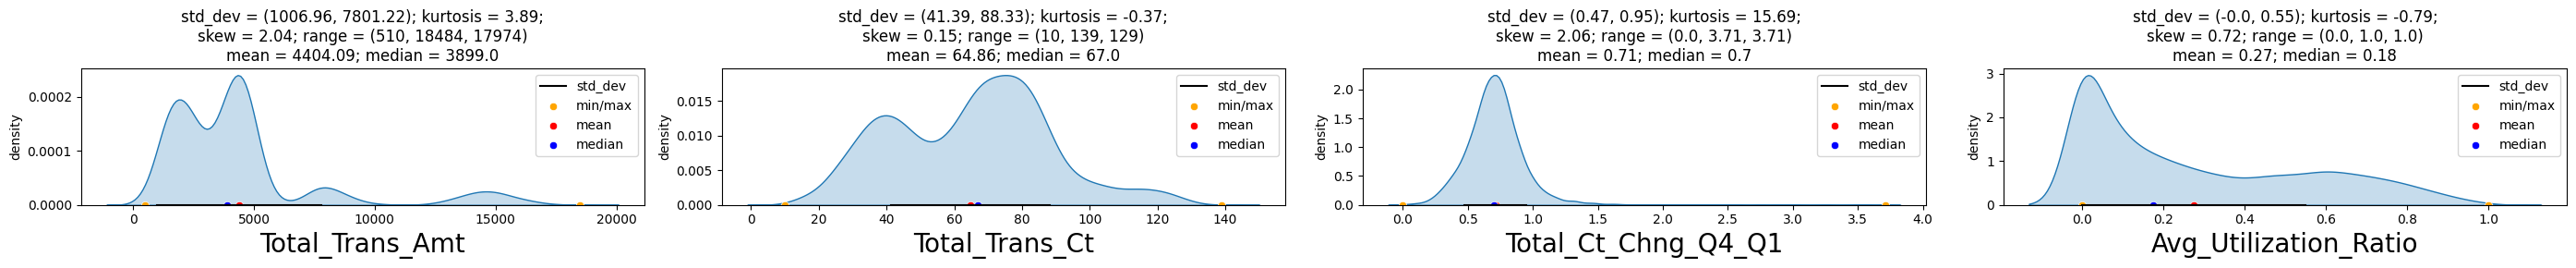

In [129]:
UVA_numeric(num_vars, num_vars.columns[10:])

### Q-Q plot for normality check

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

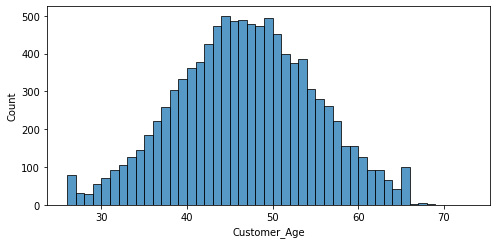

In [146]:
sns.histplot(num_vars.Customer_Age)

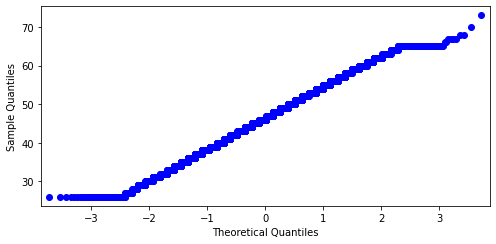

In [145]:
import statsmodels.api as sm

#a = np.random.normal(5, 5, 250)
sm.qqplot(num_vars.Customer_Age)
plt.show()

In [ ]:
#credit limit - #Total_trans_amount

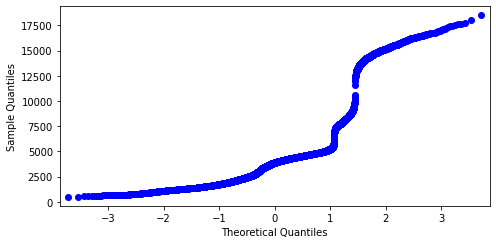

In [147]:

import statsmodels.api as sm

#a = np.random.normal(5, 5, 250)
sm.qqplot(num_vars.Total_Trans_Amt)
plt.show()

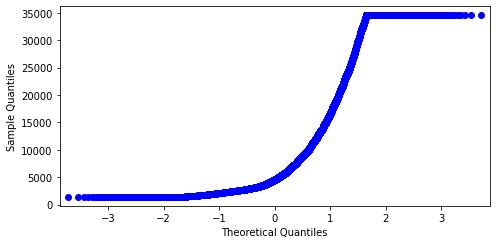

In [148]:
sm.qqplot(num_vars.Credit_Limit)
plt.show()

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1'>

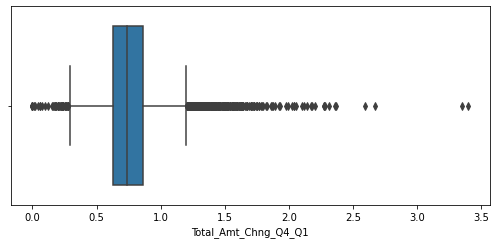

In [130]:
sns.boxplot(data = num_vars, x = 'Total_Amt_Chng_Q4_Q1')

<AxesSubplot:ylabel='Gender'>

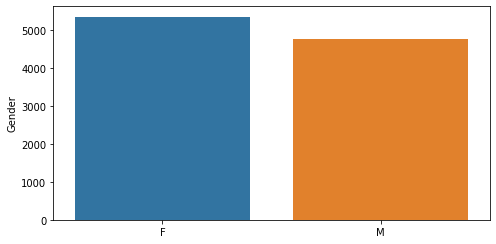

In [131]:
count_gender = ads['Gender'].value_counts()
sns.barplot(y = count_gender, x= count_gender.index)

## Bivariate Analysis : Continuous - Continuous Vars

In [149]:
ads.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [151]:
ads.groupby(['Attrition_Flag'])['Customer_Age'].mean()

Attrition_Flag
Attrited Customer    46.659496
Existing Customer    46.262118
Name: Customer_Age, dtype: float64

In [153]:
ads.groupby(['Education_Level'])['Customer_Age'].mean().round(2)

Education_Level
College          45.97
Doctorate        47.26
Graduate         46.32
High School      46.35
Post-Graduate    45.56
Uneducated       46.42
Unknown          46.43
Name: Customer_Age, dtype: float64

In [154]:
ads.groupby(['Income_Category'])['Customer_Age'].mean().round(2)

Income_Category
$120K +           47.60
$40K - $60K       46.09
$60K - $80K       45.97
$80K - $120K      46.43
Less than $40K    46.30
Unknown           46.27
Name: Customer_Age, dtype: float64

In [155]:
ads.groupby(['Card_Category'])['Customer_Age'].mean().round(2)

Card_Category
Blue        46.37
Gold        45.44
Platinum    47.50
Silver      45.68
Name: Customer_Age, dtype: float64

<AxesSubplot:xlabel='Credit_Limit', ylabel='Income_Category'>

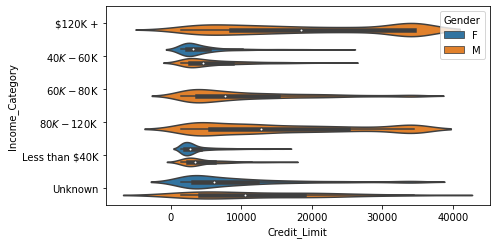

In [160]:
sns.violinplot(x='Credit_Limit',y='Income_Category',hue='Gender',data=ads)

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

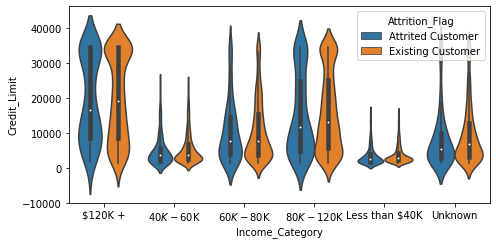

In [162]:
sns.violinplot(y='Credit_Limit',x='Income_Category',hue='Attrition_Flag',data=ads)

In [164]:
num_vars

Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                    1.625                  0.061  
1                    3.714                  0.105  
2                    2.333                  0.000  
3                    2.333                  0.760  
4                    2.500                  0.000  
...                    ...                    ...  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[10127 rows x 14 columns]

- Correlation

In [177]:
df1_two = ads[['Total_Trans_Amt', 'Total_Trans_Ct']]

In [ ]:
df1_two = ads[['Months_on_book', 'Credit_Limit']]

In [178]:
df1_two.corr()

Total_Trans_Amt  Total_Trans_Ct
Total_Trans_Amt         1.000000        0.807192
Total_Trans_Ct          0.807192        1.000000

In [179]:
correlation = num_vars.corr(method = 'pearson')

In [180]:
correlation

Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   
Contacts_Count_12_mon        -0.018452        -0.040505       -0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780        -0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062042        -0.035439       -0.048959   
Total_Trans_Amt              -0.046446         0.025046       -0.038591   
Total_Trans_Ct               -0.067097         0.049912       -0.049819   
Total_Ct_Chng_Q4_Q1          -0.012143         0.011087       -0.014072   
Avg_Utilization_Ratio         0.007114        -0.037135       -0.007541   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.010931                0.054361   
Dependent_count                          -0.039076               -0.010768   
Months_on_book                           -0.009203                0.074164   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   
Contacts_Count_12_mon                     0.055203                0.029493   
Credit_Limit                             -0.071386               -0.020394   
Total_Revolving_Bal                       0.013726               -0.042210   
Avg_Open_To_Buy                          -0.072601               -0.016605   
Total_Amt_Chng_Q4_Q1                      0.050119               -0.032247   
Total_Trans_Amt                          -0.347229               -0.036982   
Total_Trans_Ct                           -0.241891               -0.042787   
Total_Ct_Chng_Q4_Q1                       0.040831               -0.038989   
Avg_Utilization_Ratio                     0.067663               -0.007503   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age                          -0.018452      0.002476   
Dependent_count                       -0.040505      0.068065   
Months_on_book                        -0.010774      0.007507   
Total_Relationship_Count               0.055203     -0.071386   
Months_Inactive_12_mon                 0.029493     -0.020394   
Contacts_Count_12_mon                  1.000000      0.020817   
Credit_Limit                           0.020817      1.000000   
Total_Revolving_Bal                   -0.053913      0.042493   
Avg_Open_To_Buy                        0.025646      0.995981   
Total_Amt_Chng_Q4_Q1                  -0.024445      0.012813   
Total_Trans_Amt                       -0.112774      0.171730   
Total_Trans_Ct                        -0.152213      0.075927   
Total_Ct_Chng_Q4_Q1                   -0.094997     -0.002020   
Avg_Utilization_Ratio                 -0.055471     -0.482965   

                          Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                         0.014780         0.001151   
Dependent_count                     -0.002688         0.068291   
Months_on_book                       0.008623         0.006732   
Total_Relationship_Count             0.013726        -0.072601   
Months_Inactive_12_mon              -0.042210        -0.016605   
Contacts_Count_12_mon               -0.053913         0.025646   
Credit_Limit                         0.042493         0.995981   
Total_Revolving_Bal                  1.000000        -0.047167   
Avg_Open_To_Buy                     -0.047167         1.000000   
Total_Amt_Chng_Q4_Q1                 0.058174         0.007595   
Total_Trans_Amt            

In [163]:

crln_spearman = num_vars.corr(method = 'spearman')
crln_kendall = num_vars.corr(method = 'kendall')

In [160]:
correlation

Customer_Age  Dependent_count  Months_on_book  \
Customer_Age                  1.000000        -0.122254        0.788912   
Dependent_count              -0.122254         1.000000       -0.103062   
Months_on_book                0.788912        -0.103062        1.000000   
Total_Relationship_Count     -0.010931        -0.039076       -0.009203   
Months_Inactive_12_mon        0.054361        -0.010768        0.074164   
Contacts_Count_12_mon        -0.018452        -0.040505       -0.010774   
Credit_Limit                  0.002476         0.068065        0.007507   
Total_Revolving_Bal           0.014780        -0.002688        0.008623   
Avg_Open_To_Buy               0.001151         0.068291        0.006732   
Total_Amt_Chng_Q4_Q1         -0.062042        -0.035439       -0.048959   
Total_Trans_Amt              -0.046446         0.025046       -0.038591   
Total_Trans_Ct               -0.067097         0.049912       -0.049819   
Total_Ct_Chng_Q4_Q1          -0.012143         0.011087       -0.014072   
Avg_Utilization_Ratio         0.007114        -0.037135       -0.007541   

                          Total_Relationship_Count  Months_Inactive_12_mon  \
Customer_Age                             -0.010931                0.054361   
Dependent_count                          -0.039076               -0.010768   
Months_on_book                           -0.009203                0.074164   
Total_Relationship_Count                  1.000000               -0.003675   
Months_Inactive_12_mon                   -0.003675                1.000000   
Contacts_Count_12_mon                     0.055203                0.029493   
Credit_Limit                             -0.071386               -0.020394   
Total_Revolving_Bal                       0.013726               -0.042210   
Avg_Open_To_Buy                          -0.072601               -0.016605   
Total_Amt_Chng_Q4_Q1                      0.050119               -0.032247   
Total_Trans_Amt                          -0.347229               -0.036982   
Total_Trans_Ct                           -0.241891               -0.042787   
Total_Ct_Chng_Q4_Q1                       0.040831               -0.038989   
Avg_Utilization_Ratio                     0.067663               -0.007503   

                          Contacts_Count_12_mon  Credit_Limit  \
Customer_Age                          -0.018452      0.002476   
Dependent_count                       -0.040505      0.068065   
Months_on_book                        -0.010774      0.007507   
Total_Relationship_Count               0.055203     -0.071386   
Months_Inactive_12_mon                 0.029493     -0.020394   
Contacts_Count_12_mon                  1.000000      0.020817   
Credit_Limit                           0.020817      1.000000   
Total_Revolving_Bal                   -0.053913      0.042493   
Avg_Open_To_Buy                        0.025646      0.995981   
Total_Amt_Chng_Q4_Q1                  -0.024445      0.012813   
Total_Trans_Amt                       -0.112774      0.171730   
Total_Trans_Ct                        -0.152213      0.075927   
Total_Ct_Chng_Q4_Q1                   -0.094997     -0.002020   
Avg_Utilization_Ratio                 -0.055471     -0.482965   

                          Total_Revolving_Bal  Avg_Open_To_Buy  \
Customer_Age                         0.014780         0.001151   
Dependent_count                     -0.002688         0.068291   
Months_on_book                       0.008623         0.006732   
Total_Relationship_Count             0.013726        -0.072601   
Months_Inactive_12_mon              -0.042210        -0.016605   
Contacts_Count_12_mon               -0.053913         0.025646   
Credit_Limit                         0.042493         0.995981   
Total_Revolving_Bal                  1.000000        -0.047167   
Avg_Open_To_Buy                     -0.047167         1.000000   
Total_Amt_Chng_Q4_Q1                 0.058174         0.007595   
Total_Trans_Amt            

In [182]:
type(correlation)

pandas.core.frame.DataFrame

<AxesSubplot:>

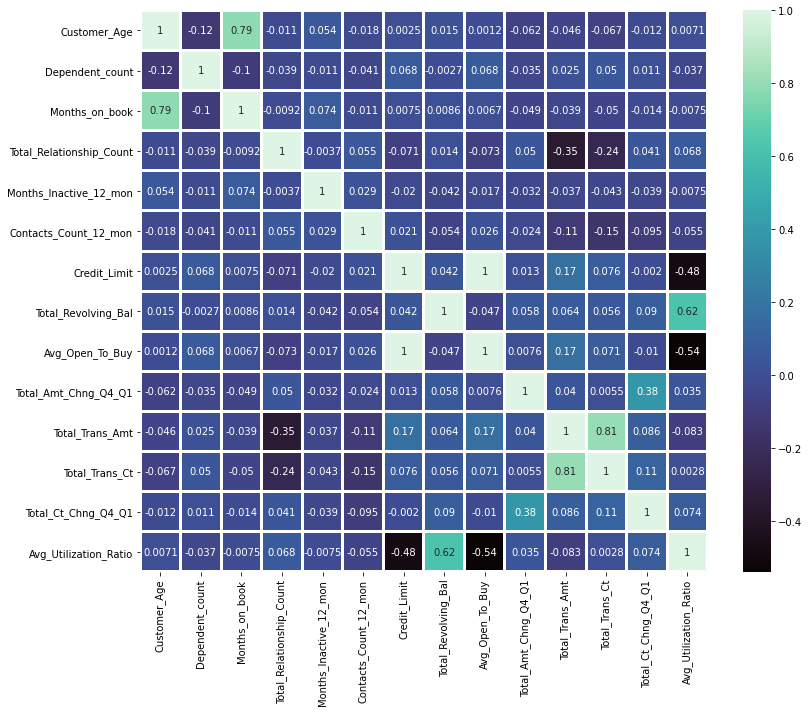

In [191]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation, linewidth=2, cmap="mako", annot=True)

<AxesSubplot:>

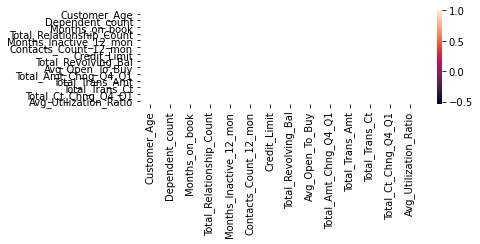

In [189]:
sns.heatmap(correlation, linewidth = 6)

<AxesSubplot:>

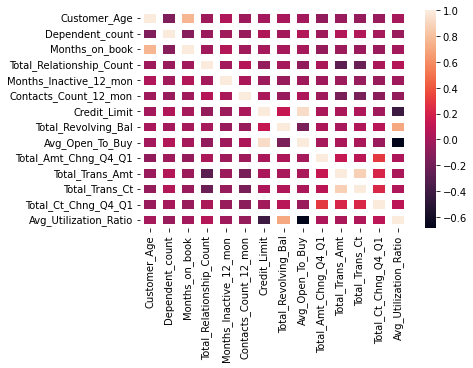

In [164]:
sns.heatmap(crln_spearman, linewidth = 6)

<AxesSubplot:>

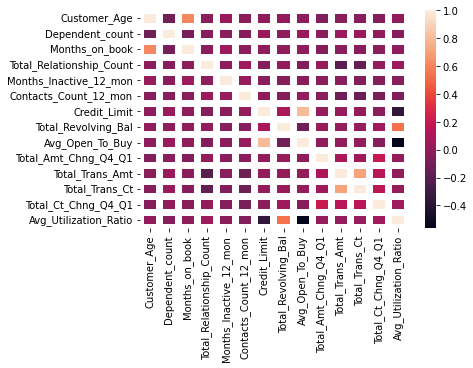

In [165]:
sns.heatmap(crln_kendall, linewidth = 6)

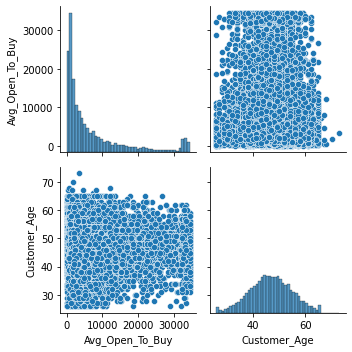

In [192]:
sns.pairplot(data = ads, vars = ['Avg_Open_To_Buy', 'Customer_Age'])




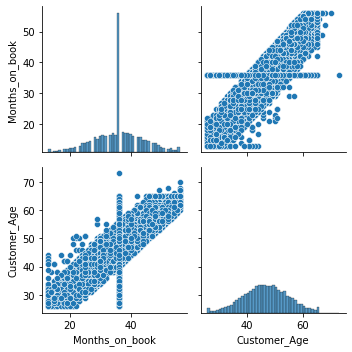

In [197]:
sns.pairplot(data = ads, vars = num_vars[['Months_on_book', 'Customer_Age']])

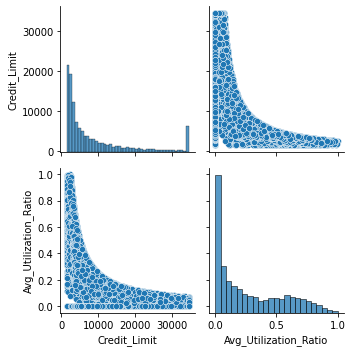

In [198]:
sns.pairplot(data = ads, vars = num_vars[['Credit_Limit', 'Avg_Utilization_Ratio']])

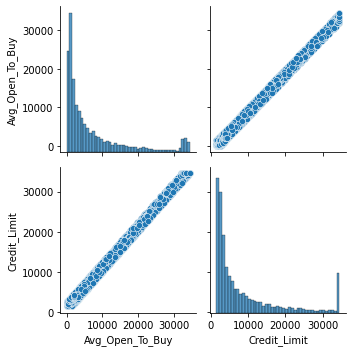

In [200]:
sns.pairplot(data = ads, vars = num_vars[['Avg_Open_To_Buy', 'Credit_Limit']])

In [168]:
num_vars.columns[0:15]

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

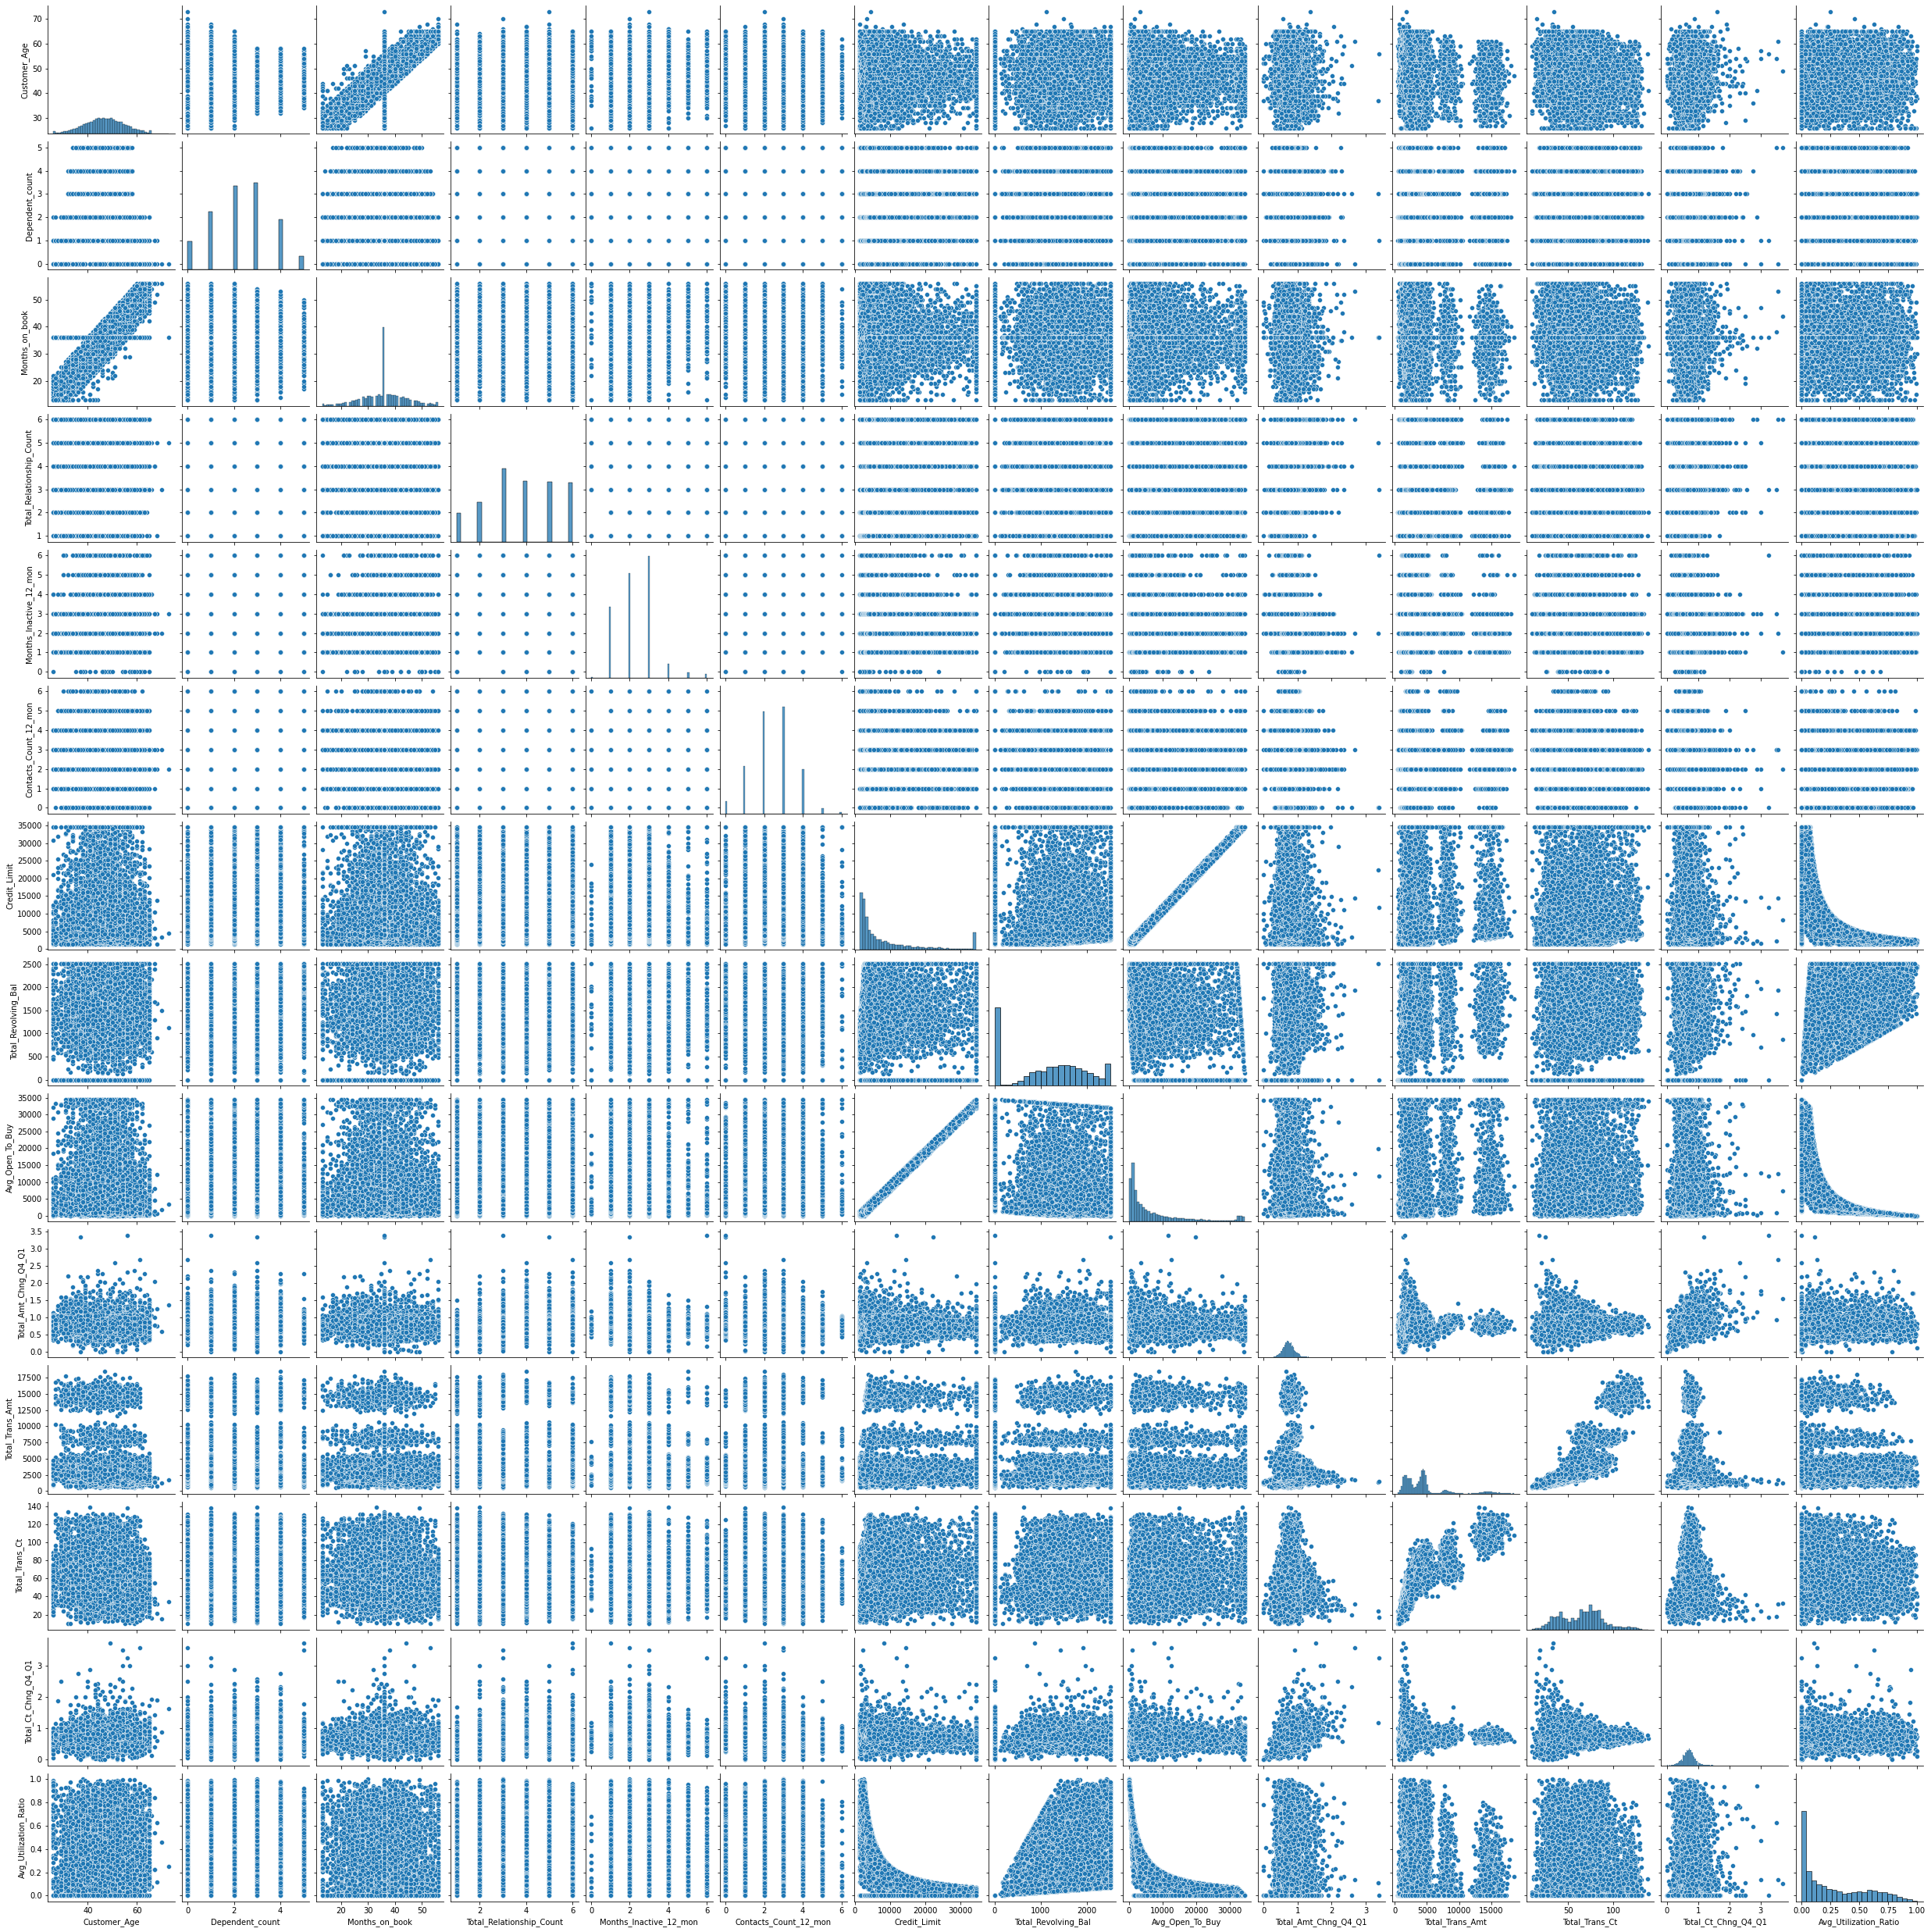

In [167]:
sns.pairplot(data = ads, vars = num_vars.columns[0:15])

In [129]:
ads.groupby(['Attrition_Flag'])['Avg_Utilization_Ratio'].mean()

Attrition_Flag
Attrited Customer    0.162475
Existing Customer    0.296412
Name: Avg_Utilization_Ratio, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Total_Revolving_Bal'>

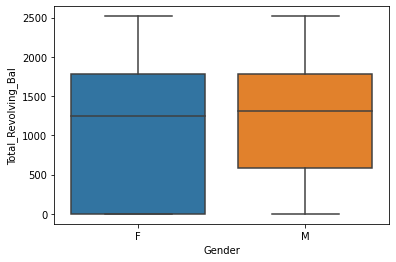

In [171]:
sns.boxplot(x = 'Gender', y = 'Total_Revolving_Bal', data = ads)

In [174]:
ads.groupby(['Gender'])['Avg_Utilization_Ratio'].mean().round(2)

Gender
F    0.34
M    0.20
Name: Avg_Utilization_Ratio, dtype: float64

- Bivariate Analysis :- Categorical - Categorical

- Hypothesis Testing

- Multivariate Analysis : T - test , Z-Test 